# ➡️ An Analysis on Datasets and Gazetteer
This notebook provides a complete analysis of datasets, gazettteers, and the relationship between dataset and gazetteer.

**Note**: Before analyzing data, you need to install `kaner` package first. Otherwise, this notebook will raise an *import error*.

```bash
cd ../
python setup.py install
```

In [45]:
import os
from typing import List

import matplotlib.pyplot as plt
from matplotlib_venn import venn3

from kaner.context import GlobalContext as gctx
from kaner.common import load_json, save_json
from kaner.adapter.in_adapter import split_dataset
from kaner.adapter.knowledge import Gazetteer
from kaner.metric.dataset import span_coverage_ratio, span_distribution, lexicon_distribution

## 1 Define `analyze` Function

In [46]:
def analyze(data_folder: str, datasets: List[str], gazetteers: List[str]) -> List[dict]:
    """
    Analyze the distribution, coverage, and diversity of dataset and gazetteer.

    Args:
        data_folder (str): The root folder of data.
        datasets (List[str]): Datasets to be analyzed.
        gazetteers (List[str]): Gazetteers to be analyzed.
    """
    assert all([dataset in gctx.get_dataset_names() for dataset in datasets])
    assert all([gazetteer in gctx.get_gazetteer_names() for gazetteer in gazetteers])
    datahub_folder = os.path.join(data_folder, "datahub")
    reports = []

    for dataset in datasets:
        # make sure the dataset has been preprocessed with a unified format
        dataset_folder = os.path.join(datahub_folder, dataset)
        datahub = gctx.create_datahub(dataset, root_folder=dataset_folder)
        datahub.preprocess()

        trainset, devset, testset = split_dataset(dataset_folder)
        print("KANER is analyzing dataset {0}...".format(dataset))
        report = {
            "dataset": dataset,
            "span_coverage_ratio": {
                "test-train": span_coverage_ratio(trainset, testset),
                "dev-train": span_coverage_ratio(trainset, devset)
            },
            "distribution": {
                "train": span_distribution(trainset),
                "dev": span_distribution(devset),
                "test": span_distribution(testset)
            },
            "gazetteer": []
        }

        for gazetteer_model in gazetteers:
            # make sure the gazetteer has been preprocessed with a unified format
            gazetteer_folder = os.path.join(data_folder, "modelhub", gazetteer_model)
            modelhub = gctx.create_gazetteer(gazetteer_model, root_folder=gazetteer_folder)
            modelhub.preprocess()

            gazetteer = Gazetteer(gazetteer_folder)
            report["gazetteer"].append({
                "gazetteer": gazetteer_model,
                "train": lexicon_distribution(gazetteer, trainset),
                "dev": lexicon_distribution(gazetteer, devset),
                "test": lexicon_distribution(gazetteer, testset)
            })

        reports.append(report)

    return reports

## 2 Given datasets, gazetteers, analyze them
You can find all available datasets and gazetteers by the following code block.

```python
datasets = gctx.get_dataset_names()
gazetteers = gctx.get_gazetteer_names()
```

In [47]:
data_folder = "../data"
log_folder = os.path.join(data_folder, "logs")
report_name = "dataset_reports.json"
datasets = ["weiboner", "resumener", "ontonotes", "msraner", "ecommerce"]
gazetteers = ["gigaword", "tec", "sgns"]
file_path = os.path.join(log_folder, report_name)
analyze_again = False

if analyze_again or not os.path.isfile(file_path):
    reports = analyze(data_folder, datasets, gazetteers)
    save_json(reports, log_folder, report_name)

reports = load_json("utf-8", file_path)

## 3 Visualization
- https://matplotlib.org/gallery/lines_bars_and_markers/stem_plot.html#sphx-glr-gallery-lines-bars-and-markers-stem-plot-py
- https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html#sphx-glr-gallery-style-sheets-style-sheets-reference-py

**Note**: You can install package `pandoc` for exporting this notebook to a PDF file.

```bash
sudo apt install pandoc
```

# 1 Dataset: weiboner; Entity Coverage Ratio: 0.5701281255753378 (dev-train), 0.5158613001191712 (test-train)
## 1.1 Length Distribution


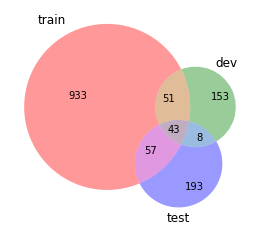

Partition Type: train; 
[Sentence] max: 175, min: 10, avg: 54.65037037037037


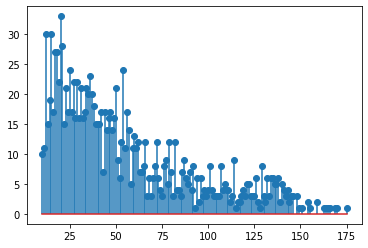

[Span] max: 11, min: 1, avg: 2.6153846153846154


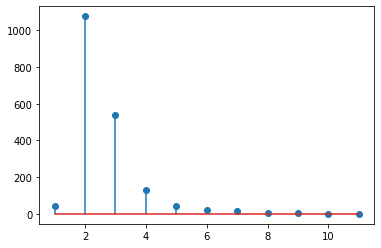

[Label] PER - LOC - GPE - ORG


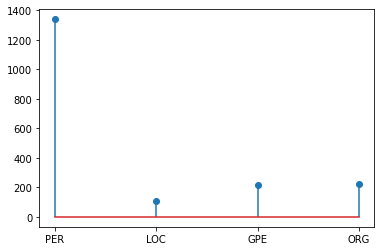

Partition Type: dev; 
[Sentence] max: 145, min: 10, avg: 53.737037037037034


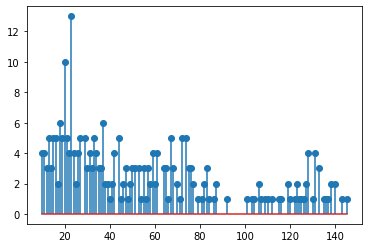

[Span] max: 11, min: 1, avg: 2.4961439588688945


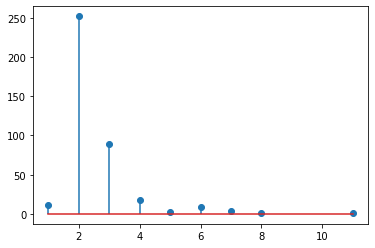

[Label] PER - GPE - ORG - LOC


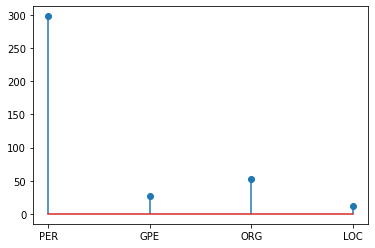

Partition Type: test; 
[Sentence] max: 146, min: 10, avg: 54.97037037037037


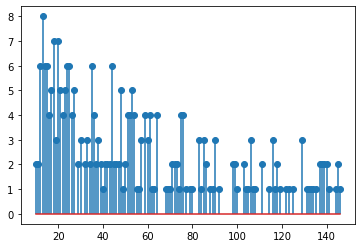

[Span] max: 11, min: 1, avg: 2.5676328502415457


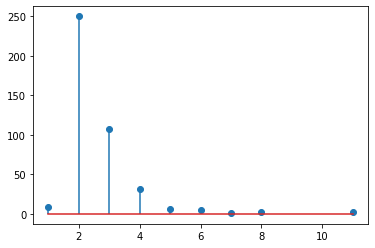

[Label] PER - GPE - ORG - LOC


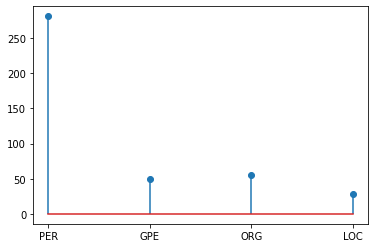

## 1.2 Gazetteer Matching Distribution
Gazetteer: gigaword
Partition Type: train; gECR: 0.5883289124668435
[Sentence] max: 313, min: 3, avg: 72.5437037037037


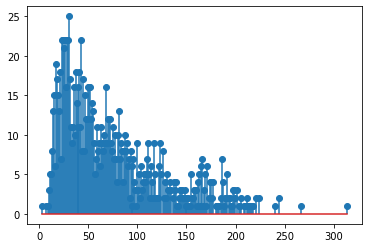

[Token] max: 19, min: 0, avg: 1.78002927702025


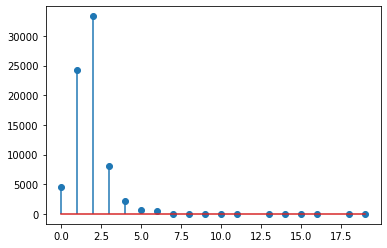

Partition Type: dev; gECR: 0.6709511568123393
[Sentence] max: 229, min: 7, avg: 71.75185185185185


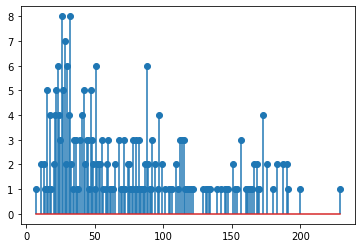

[Token] max: 10, min: 0, avg: 1.7991591426011442


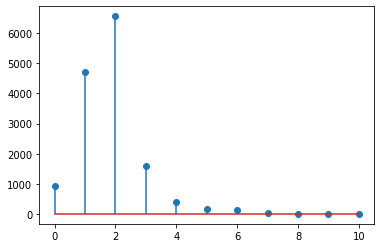

Partition Type: test; gECR: 0.6256038647342995
[Sentence] max: 219, min: 10, avg: 73.74814814814815


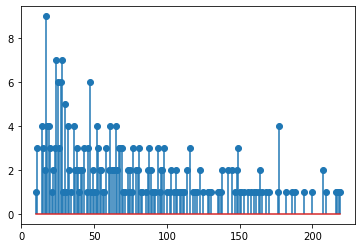

[Token] max: 10, min: 0, avg: 1.8123568252257107


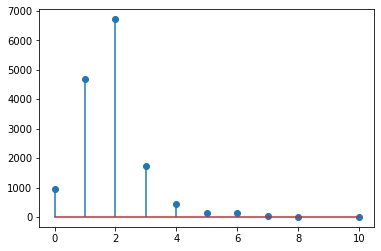

Gazetteer: tec
Partition Type: train; gECR: 0.1729442970822281
[Sentence] max: 112, min: 0, avg: 19.496296296296297


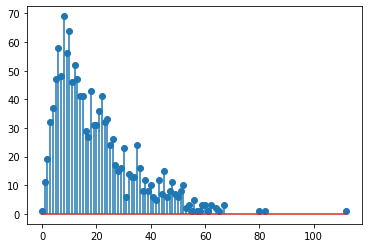

[Token] max: 6, min: 0, avg: 0.4438857111876169


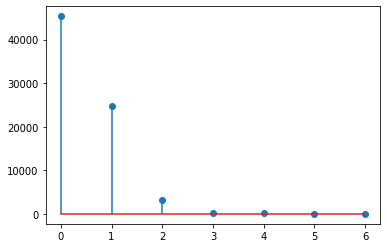

Partition Type: dev; gECR: 0.12596401028277635
[Sentence] max: 66, min: 0, avg: 19.27777777777778


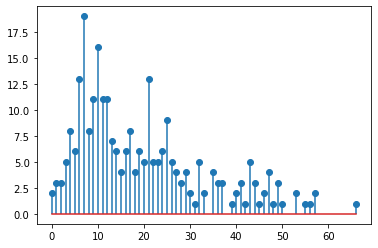

[Token] max: 5, min: 0, avg: 0.4473774898338962


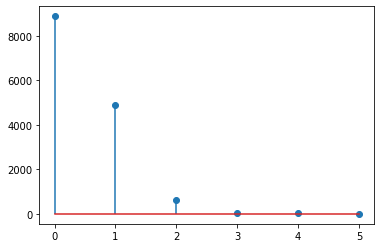

Partition Type: test; gECR: 0.18115942028985507
[Sentence] max: 108, min: 1, avg: 19.325925925925926


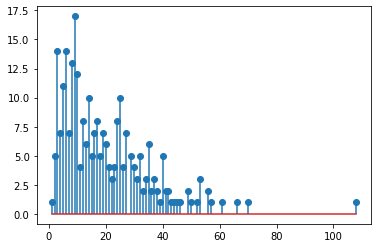

[Token] max: 5, min: 0, avg: 0.4451556394016979


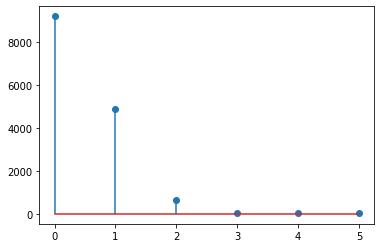

Gazetteer: sgns
Partition Type: train; gECR: 0.6997347480106101
[Sentence] max: 391, min: 10, avg: 80.11259259259259


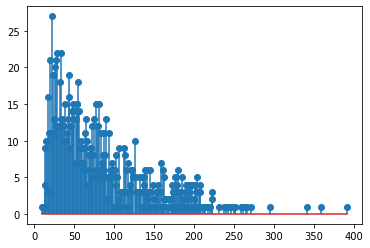

[Token] max: 44, min: 0, avg: 2.0442679389519913


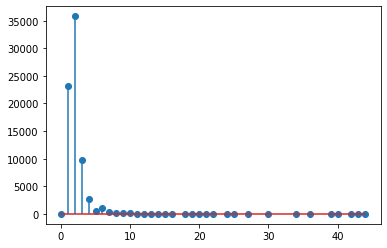

Partition Type: dev; gECR: 0.7969151670951157
[Sentence] max: 274, min: 12, avg: 79.38518518518518


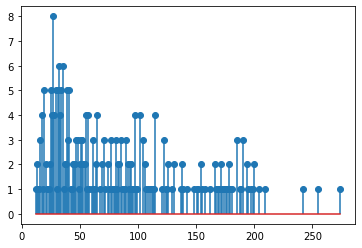

[Token] max: 14, min: 0, avg: 2.078916534564753


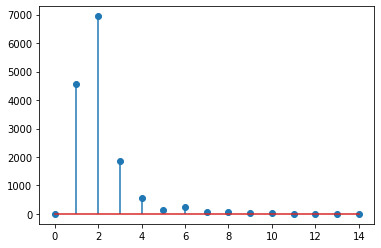

Partition Type: test; gECR: 0.7584541062801933
[Sentence] max: 259, min: 12, avg: 81.3


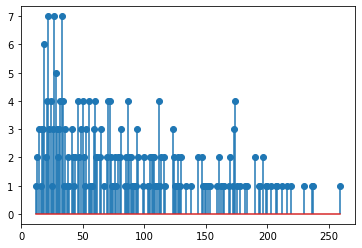

[Token] max: 16, min: 0, avg: 2.078156582670799


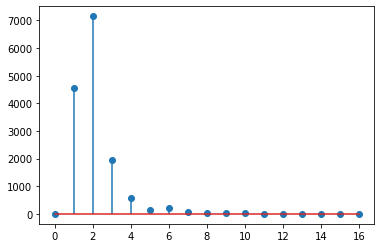

# 2 Dataset: resumener; Entity Coverage Ratio: 0.3504378680295495 (dev-train), 0.35083008070682503 (test-train)
## 2.1 Length Distribution


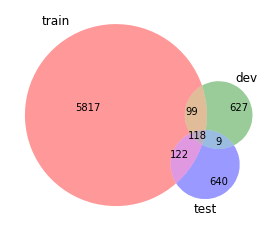

Partition Type: train; 
[Sentence] max: 178, min: 3, avg: 32.47814708191573


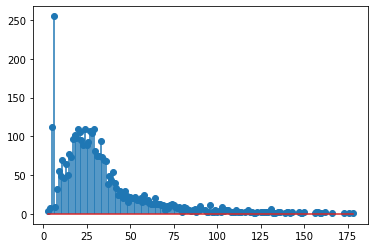

[Span] max: 58, min: 2, avg: 5.9138124859476875


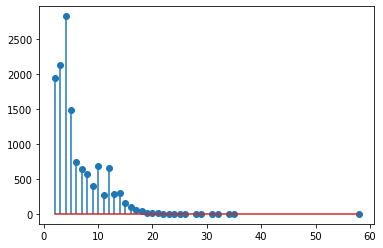

[Label] NAME - CONT - RACE - TITLE - EDU - ORG - PRO - LOC


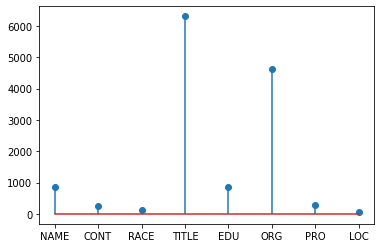

Partition Type: dev; 
[Sentence] max: 178, min: 4, avg: 30.0


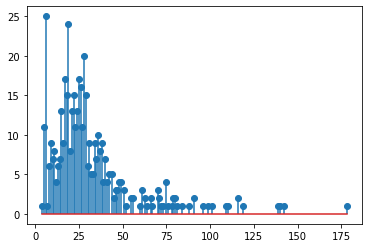

[Span] max: 36, min: 2, avg: 5.668682795698925


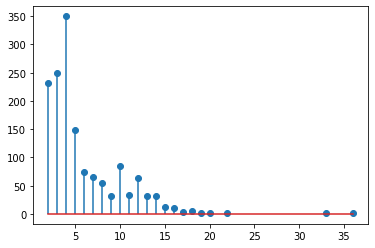

[Label] NAME - CONT - EDU - TITLE - ORG - RACE - PRO - LOC


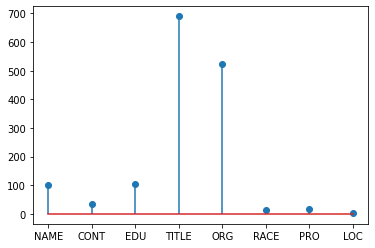

Partition Type: test; 
[Sentence] max: 167, min: 4, avg: 31.656184486373167


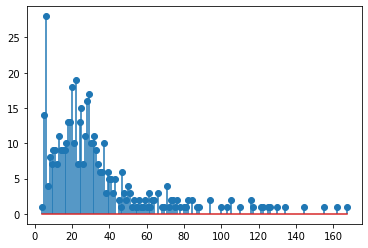

[Span] max: 28, min: 2, avg: 6.079754601226994


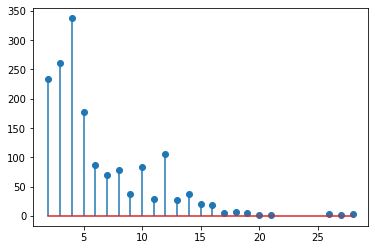

[Label] NAME - PRO - EDU - TITLE - ORG - CONT - RACE - LOC


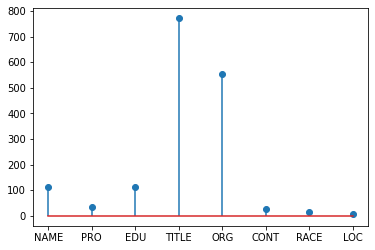

## 2.2 Gazetteer Matching Distribution
Gazetteer: gigaword
Partition Type: train; gECR: 0.2802218391666042
[Sentence] max: 344, min: 2, avg: 56.04894006804501


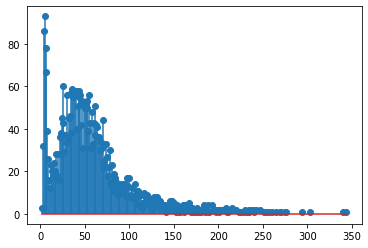

[Token] max: 12, min: 0, avg: 2.7791521285425347


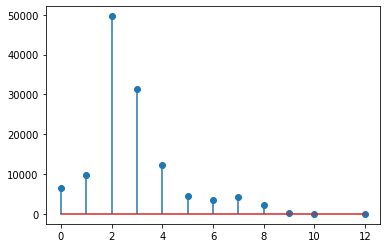

Partition Type: dev; gECR: 0.301747311827957
[Sentence] max: 292, min: 3, avg: 51.80129589632829


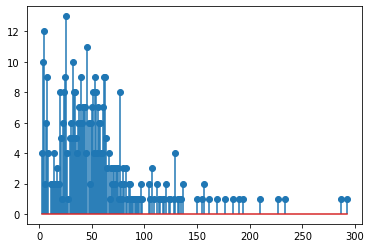

[Token] max: 10, min: 0, avg: 2.7913606911447086


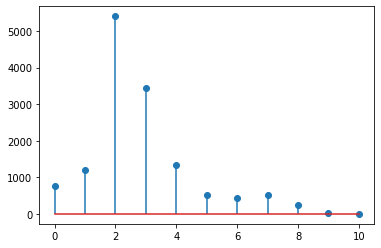

Partition Type: test; gECR: 0.296319018404908
[Sentence] max: 277, min: 2, avg: 54.081761006289305


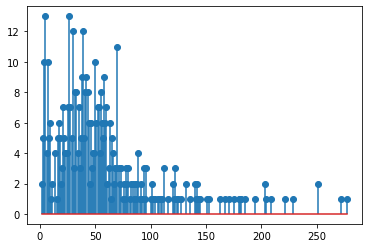

[Token] max: 10, min: 0, avg: 2.7303973509933774


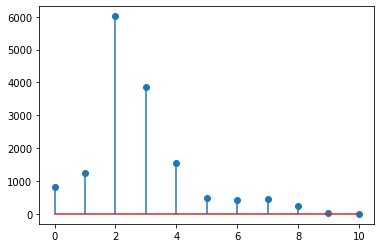

Gazetteer: tec
Partition Type: train; gECR: 0.02285842763996103
[Sentence] max: 123, min: 0, avg: 13.37084532844805


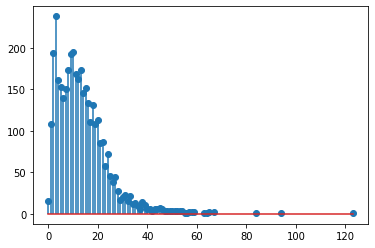

[Token] max: 7, min: 0, avg: 0.5555322766500939


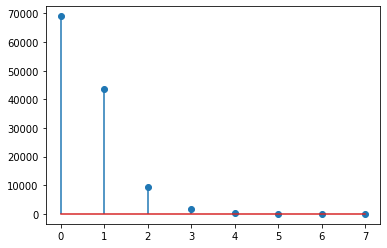

Partition Type: dev; gECR: 0.027553763440860215
[Sentence] max: 77, min: 1, avg: 12.218142548596113


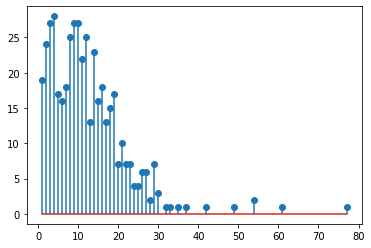

[Token] max: 4, min: 0, avg: 0.551979841612671


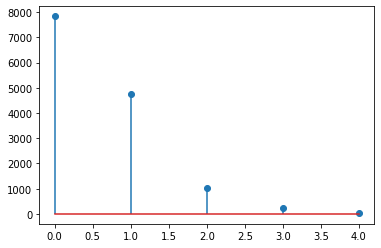

Partition Type: test; gECR: 0.02147239263803681
[Sentence] max: 57, min: 1, avg: 12.756813417190775


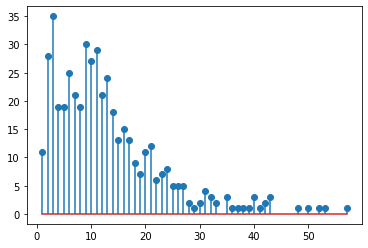

[Token] max: 4, min: 0, avg: 0.5431125827814569


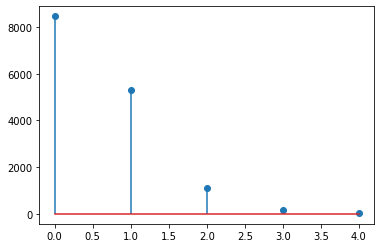

Gazetteer: sgns
Partition Type: train; gECR: 0.409428164580679
[Sentence] max: 330, min: 3, avg: 56.21852918084271


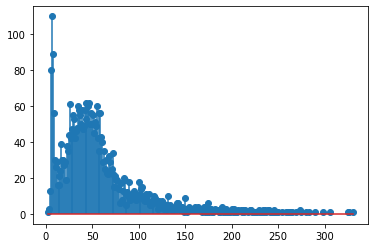

[Token] max: 15, min: 1, avg: 2.8525451454081017


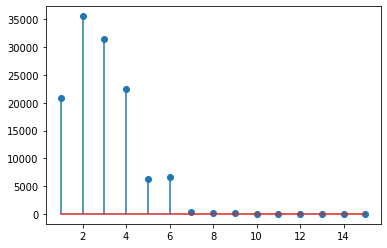

Partition Type: dev; gECR: 0.4428763440860215
[Sentence] max: 312, min: 4, avg: 51.89416846652268


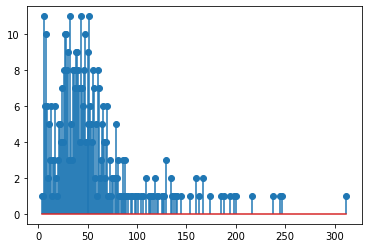

[Token] max: 11, min: 1, avg: 2.8460763138948884


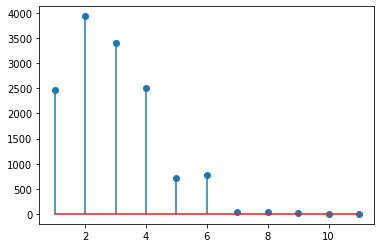

Partition Type: test; gECR: 0.4288343558282209
[Sentence] max: 280, min: 5, avg: 54.702306079664574


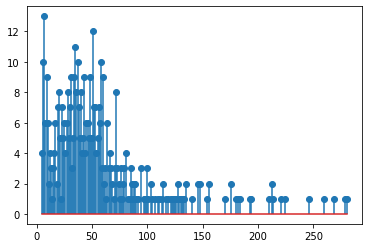

[Token] max: 10, min: 1, avg: 2.847682119205298


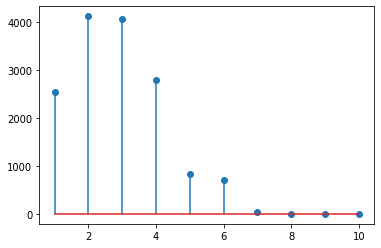

# 3 Dataset: ontonotes; Entity Coverage Ratio: 0.11624862001657477 (dev-train), 0.11632095232360547 (test-train)
## 3.1 Length Distribution


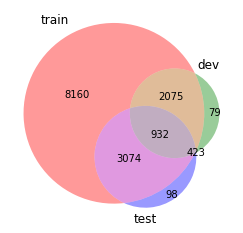

Partition Type: train; 
[Sentence] max: 409, min: 1, avg: 36.257009582720684


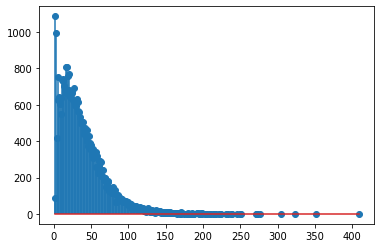

[Span] max: 38, min: 1, avg: 3.599159849657307


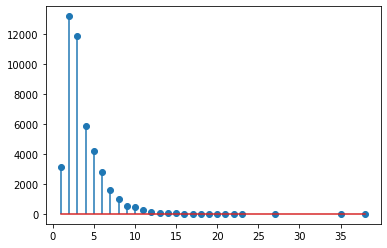

[Label] GPE - ORG - DATE - PERSON - ORDINAL - MONEY - LOC - PERCENT - CARDINAL - QUANTITY - TIME - WORK_OF_ART - EVENT - NORP - FAC - LAW - LANGUAGE - PRODUCT


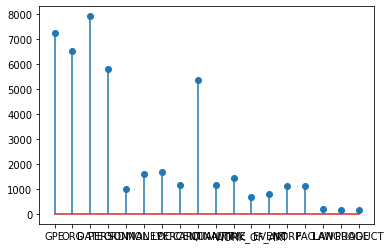

Partition Type: dev; 
[Sentence] max: 324, min: 1, avg: 34.4


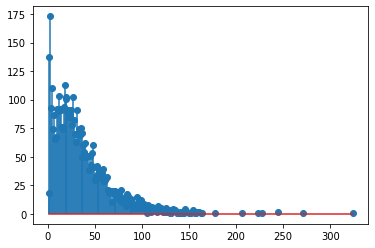

[Span] max: 23, min: 1, avg: 3.6407138654638165


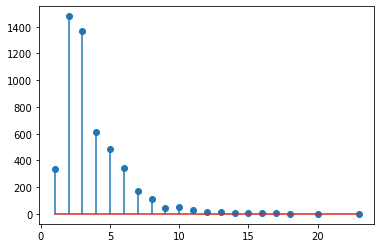

[Label] LOC - ORG - GPE - ORDINAL - CARDINAL - DATE - PERSON - LANGUAGE - QUANTITY - EVENT - NORP - FAC - WORK_OF_ART - TIME - MONEY - PERCENT - LAW - PRODUCT


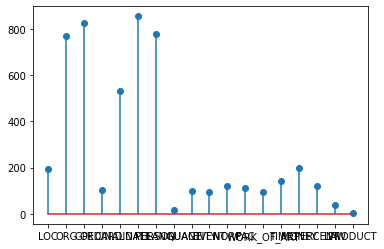

Partition Type: test; 
[Sentence] max: 272, min: 1, avg: 41.14320486815416


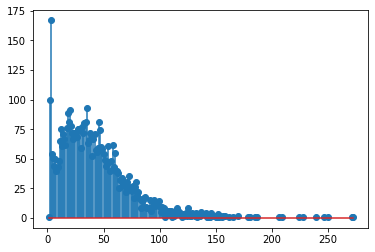

[Span] max: 27, min: 1, avg: 3.718364518364518


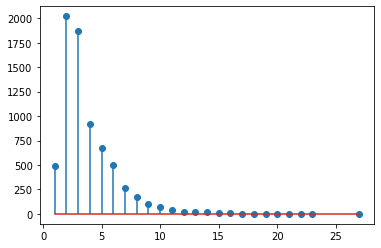

[Label] DATE - ORG - PERCENT - GPE - MONEY - TIME - CARDINAL - LOC - PERSON - EVENT - NORP - QUANTITY - WORK_OF_ART - FAC - ORDINAL - LAW - PRODUCT - LANGUAGE


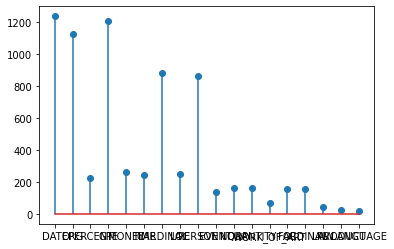

## 3.2 Gazetteer Matching Distribution
Gazetteer: gigaword
Partition Type: train; gECR: 0.5332964846340924
[Sentence] max: 588, min: 0, avg: 50.69751052071186


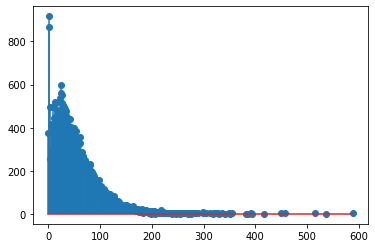

[Token] max: 14, min: 0, avg: 1.9450291359074363


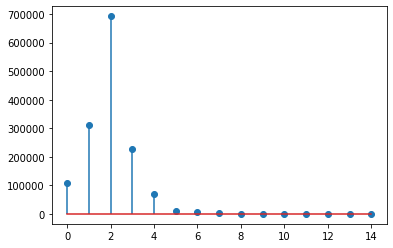

Partition Type: dev; gECR: 0.5261816042361247
[Sentence] max: 536, min: 0, avg: 47.75111561866126


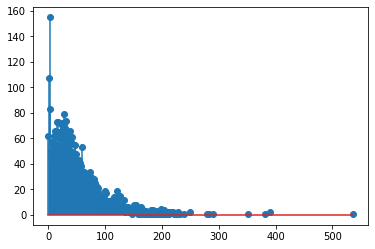

[Token] max: 12, min: 0, avg: 1.923333647813576


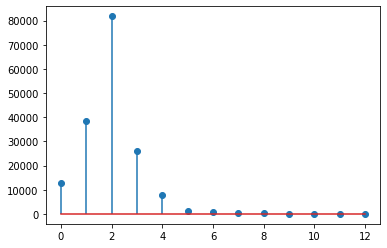

Partition Type: test; gECR: 0.5230769230769231
[Sentence] max: 416, min: 0, avg: 58.783975659229206


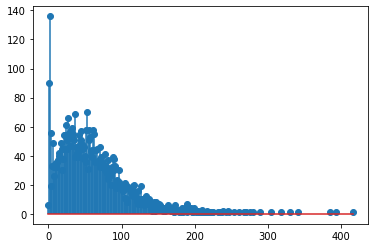

[Token] max: 13, min: 0, avg: 2.0140556903113844


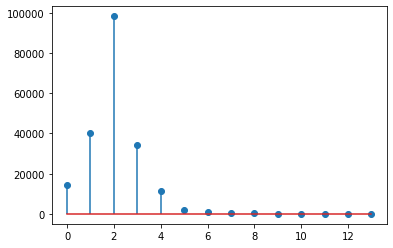

Gazetteer: tec
Partition Type: train; gECR: 0.09164271501216006
[Sentence] max: 132, min: 0, avg: 11.376185164528723


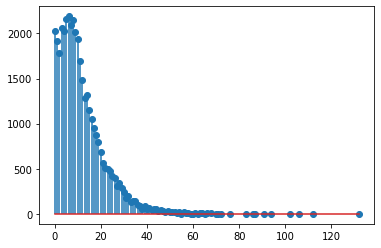

[Token] max: 5, min: 0, avg: 0.3816636064757648


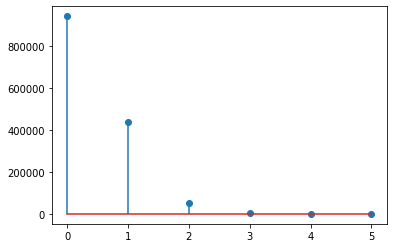

Partition Type: dev; gECR: 0.08962541674838204
[Sentence] max: 106, min: 0, avg: 10.96369168356998


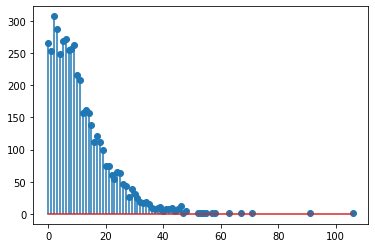

[Token] max: 5, min: 0, avg: 0.3893402990707109


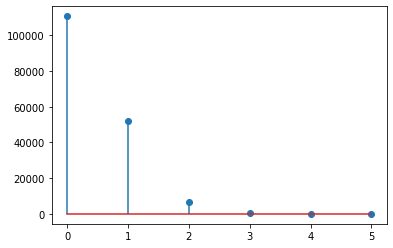

Partition Type: test; gECR: 0.09646569646569647
[Sentence] max: 102, min: 0, avg: 12.573225152129817


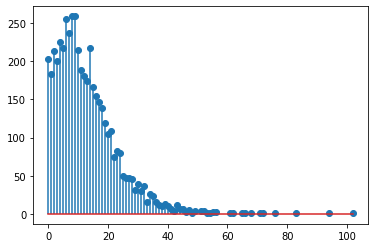

[Token] max: 4, min: 0, avg: 0.3739277051410992


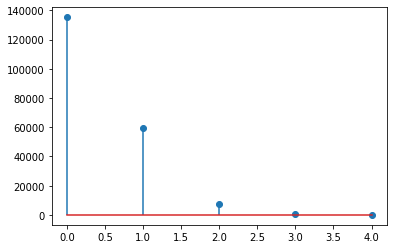

Gazetteer: sgns
Partition Type: train; gECR: 0.5442184390891002
[Sentence] max: 622, min: 1, avg: 54.24747756426507


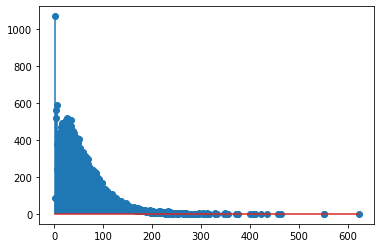

[Token] max: 15, min: 1, avg: 2.101203053571753


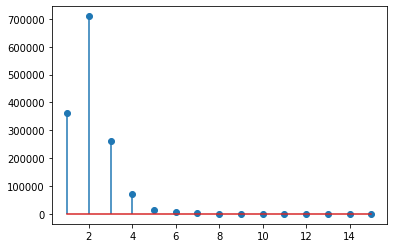

Partition Type: dev; gECR: 0.5487350460874681
[Sentence] max: 551, min: 1, avg: 51.3340770791075


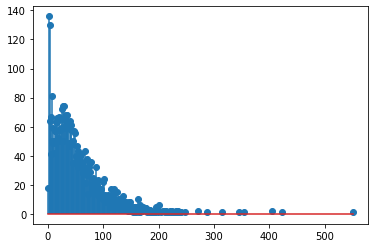

[Token] max: 15, min: 1, avg: 2.0918144723807726


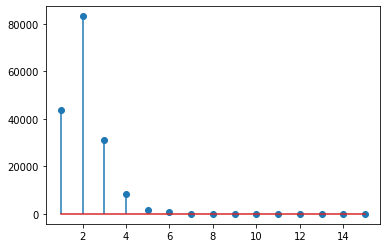

Partition Type: test; gECR: 0.5495495495495496
[Sentence] max: 434, min: 1, avg: 62.34787018255578


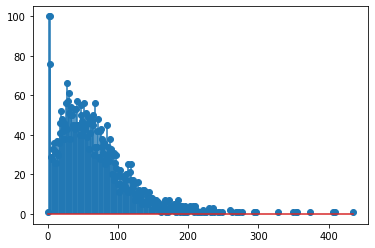

[Token] max: 15, min: 1, avg: 2.1513587331637383


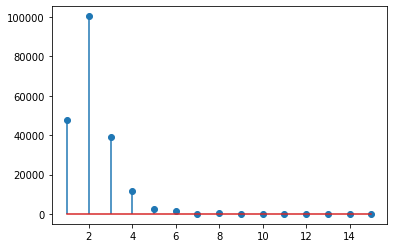

# 4 Dataset: msraner; Entity Coverage Ratio: 0.15501534538069855 (dev-train), 0.1871159481421128 (test-train)
## 4.1 Length Distribution


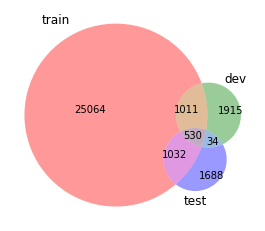

Partition Type: train; 
[Sentence] max: 581, min: 5, avg: 46.814968366564415


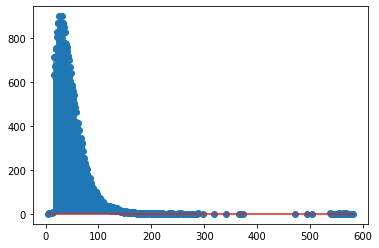

[Span] max: 35, min: 1, avg: 3.2696624169509785


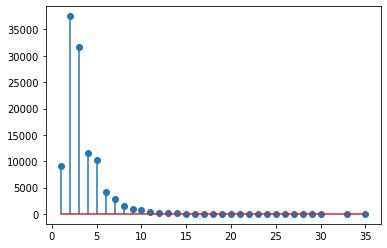

[Label] INTEGER - ORDINAL - LOCATION - DATE - ORGANIZATION - PERSON - MONEY - DURATION - TIME - LENGTH - AGE - FREQUENCY - ANGLE - PHONE - PERCENT - FRACTION - WEIGHT - AREA - CAPACTITY - DECIMAL - MEASURE - SPEED - TEMPERATURE - POSTALCODE - RATE - WWW


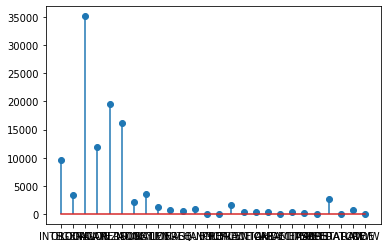

Partition Type: dev; 
[Sentence] max: 505, min: 6, avg: 46.1041846419327


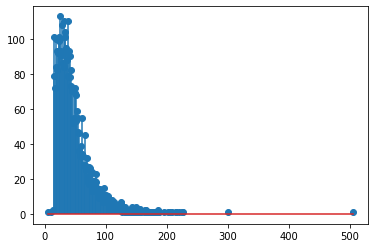

[Span] max: 22, min: 1, avg: 3.3036894273127753


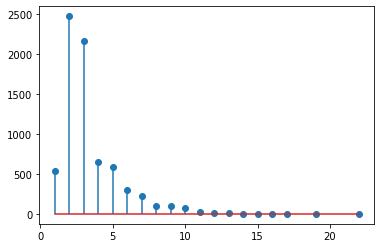

[Label] DATE - FRACTION - PERSON - INTEGER - PERCENT - DURATION - LOCATION - ORGANIZATION - AGE - ORDINAL - FREQUENCY - TIME - MEASURE - MONEY - TEMPERATURE - LENGTH - AREA - PHONE - WEIGHT - DECIMAL - CAPACTITY - ANGLE


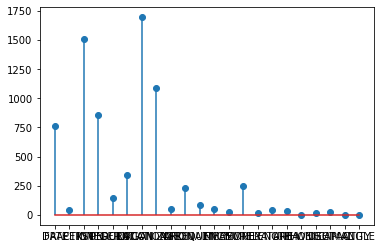

Partition Type: test; 
[Sentence] max: 1475, min: 1, avg: 39.46437571592211


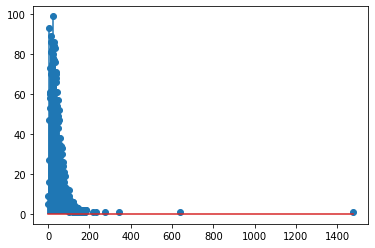

[Span] max: 23, min: 1, avg: 3.286699976207471


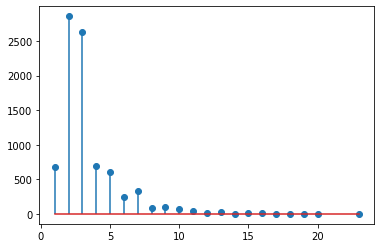

[Label] ORGANIZATION - DURATION - PERSON - LOCATION - FREQUENCY - DATE - ORDINAL - INTEGER - TIME - MONEY - PERCENT - FRACTION - AGE - PHONE - LENGTH - AREA - MEASURE - DECIMAL - TEMPERATURE - RATE - ANGLE - WEIGHT


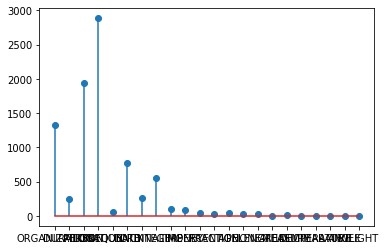

## 4.2 Gazetteer Matching Distribution
Gazetteer: gigaword
Partition Type: train; gECR: 0.5462740168791524
[Sentence] max: 673, min: 0, avg: 65.9439465107362


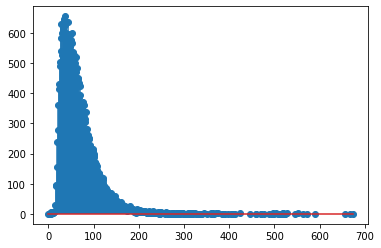

[Token] max: 13, min: 0, avg: 1.9627037693979252


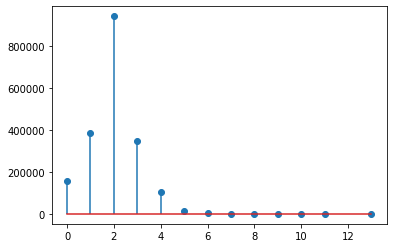

Partition Type: dev; gECR: 0.4829295154185022
[Sentence] max: 761, min: 3, avg: 63.994607420189816


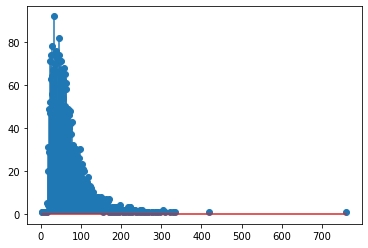

[Token] max: 9, min: 0, avg: 1.8981000191822737


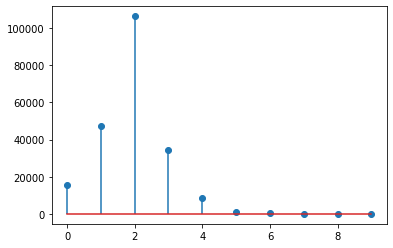

Partition Type: test; gECR: 0.6214608612895551
[Sentence] max: 2409, min: 1, avg: 56.37502863688431


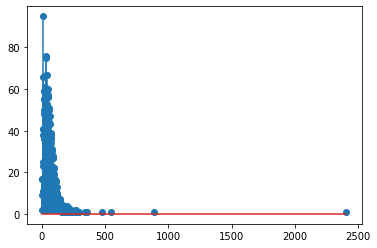

[Token] max: 12, min: 0, avg: 1.9928422983594756


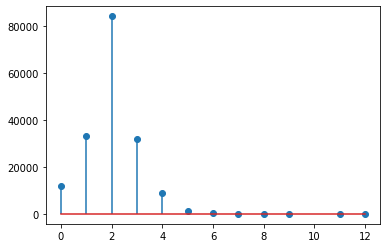

Gazetteer: tec
Partition Type: train; gECR: 0.14179385886155504
[Sentence] max: 204, min: 0, avg: 13.870710314417177


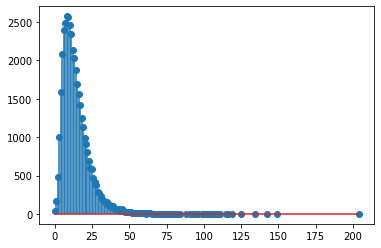

[Token] max: 5, min: 0, avg: 0.3631772796961344


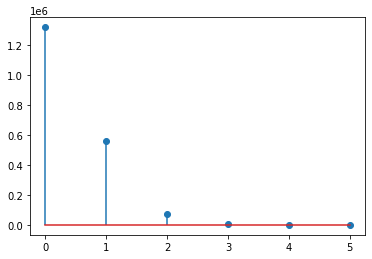

Partition Type: dev; gECR: 0.10669052863436124
[Sentence] max: 159, min: 0, avg: 13.766824849007765


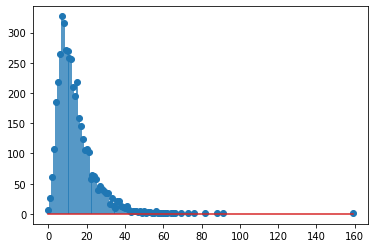

[Token] max: 5, min: 0, avg: 0.3607624252008291


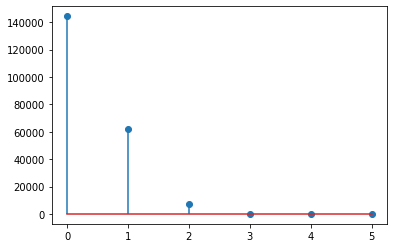

Partition Type: test; gECR: 0.13704496788008566
[Sentence] max: 401, min: 0, avg: 12.079725085910653


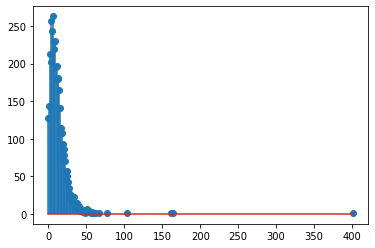

[Token] max: 4, min: 0, avg: 0.3763975804298104


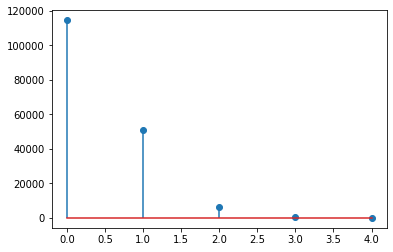

Gazetteer: sgns
Partition Type: train; gECR: 0.6260639253007722
[Sentence] max: 863, min: 7, avg: 71.55667657208589


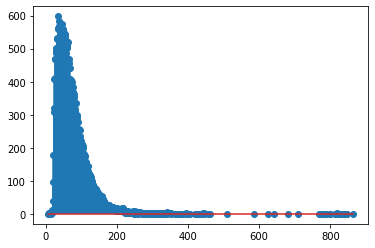

[Token] max: 13, min: 1, avg: 2.19952137067154


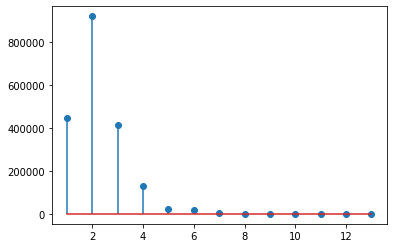

Partition Type: dev; gECR: 0.5845264317180616
[Sentence] max: 795, min: 8, avg: 69.1995254529767


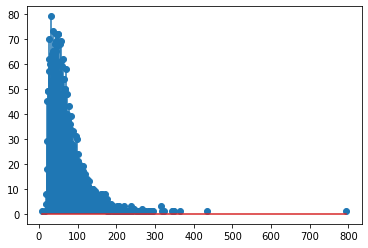

[Token] max: 13, min: 1, avg: 2.1268182222243017


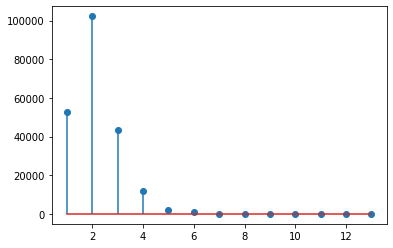

Partition Type: test; gECR: 0.7236497739709731
[Sentence] max: 2529, min: 1, avg: 60.843069873997706


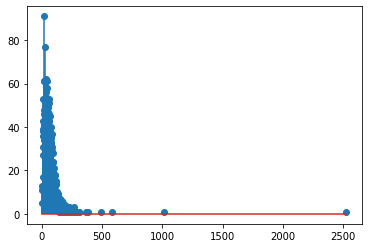

[Token] max: 13, min: 0, avg: 2.2503047683180273


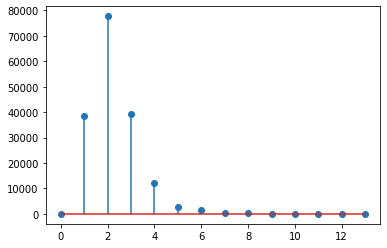

# 5 Dataset: ecommerce; Entity Coverage Ratio: 0.7704912758587408 (dev-train), 0.7618664686660305 (test-train)
## 5.1 Length Distribution


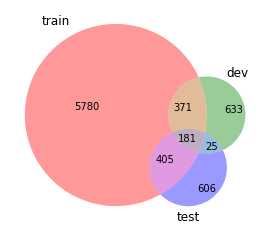

Partition Type: train; 
[Sentence] max: 380, min: 1, avg: 29.853346703434443


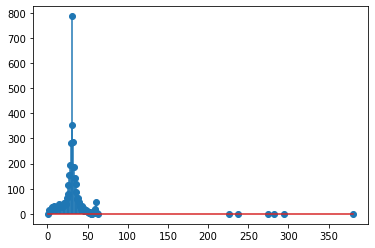

[Span] max: 24, min: 1, avg: 2.6965317919075145


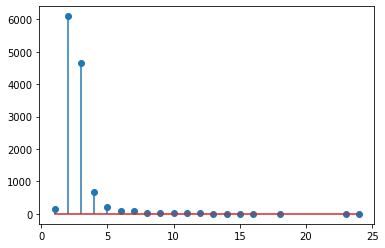

[Label] HP - HC


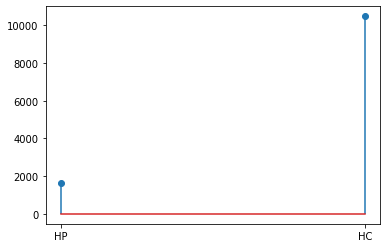

Partition Type: dev; 
[Sentence] max: 280, min: 2, avg: 29.77


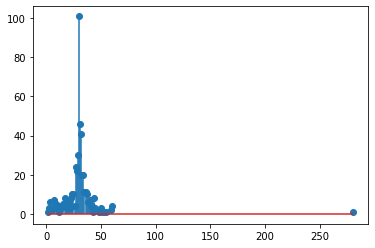

[Span] max: 19, min: 1, avg: 2.694155844155844


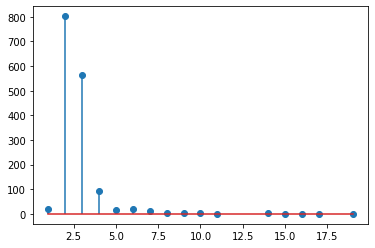

[Label] HC - HP


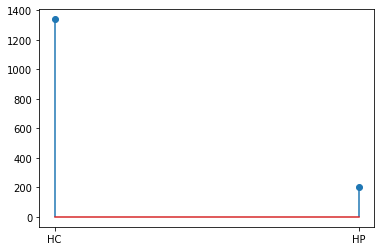

Partition Type: test; 
[Sentence] max: 60, min: 2, avg: 29.477911646586346


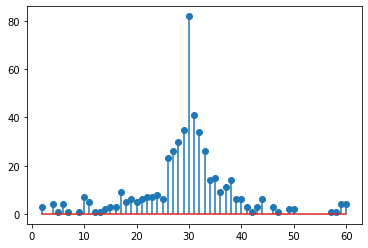

[Span] max: 24, min: 1, avg: 2.721123165283982


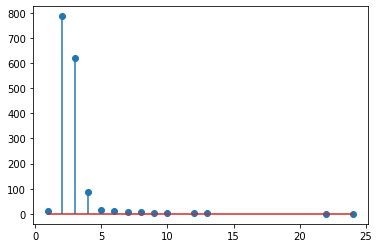

[Label] HP - HC


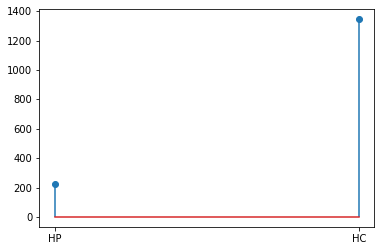

## 5.2 Gazetteer Matching Distribution
Gazetteer: gigaword
Partition Type: train; gECR: 0.5381502890173411
[Sentence] max: 603, min: 1, avg: 44.51441464026072


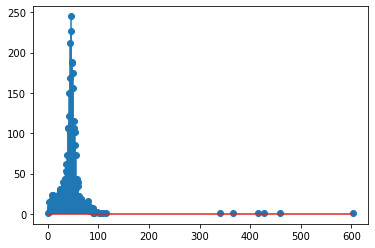

[Token] max: 12, min: 0, avg: 2.1312927740689425


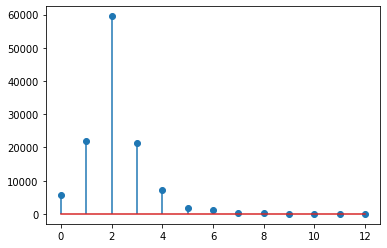

Partition Type: dev; gECR: 0.5461038961038961
[Sentence] max: 427, min: 3, avg: 44.54


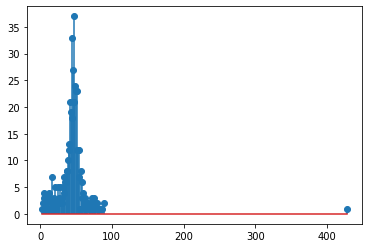

[Token] max: 9, min: 0, avg: 2.131004366812227


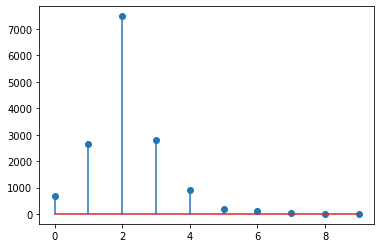

Partition Type: test; gECR: 0.5207402680280792
[Sentence] max: 98, min: 2, avg: 43.96987951807229


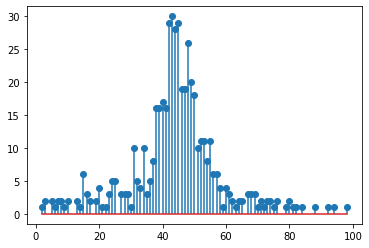

[Token] max: 10, min: 0, avg: 2.1247956403269757


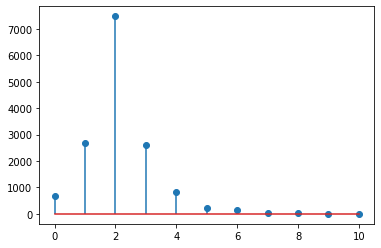

Gazetteer: tec
Partition Type: train; gECR: 0.6121387283236994
[Sentence] max: 145, min: 0, avg: 14.649786914013537


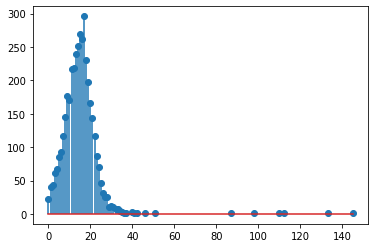

[Token] max: 8, min: 0, avg: 0.7661166393752362


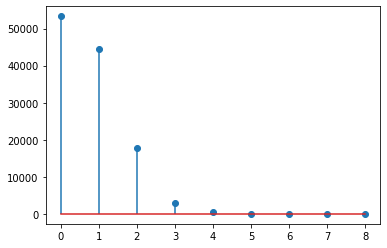

Partition Type: dev; gECR: 0.6298701298701299
[Sentence] max: 120, min: 0, avg: 14.914


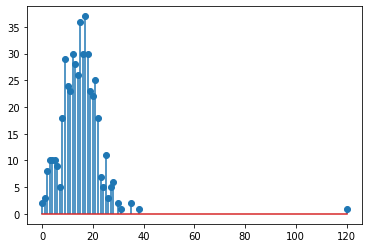

[Token] max: 7, min: 0, avg: 0.7773597581457844


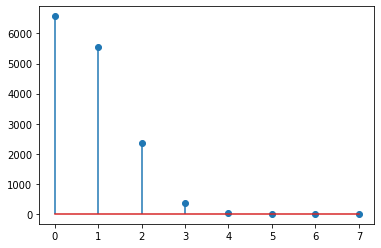

Partition Type: test; gECR: 0.614550095724314
[Sentence] max: 35, min: 0, avg: 14.610441767068274


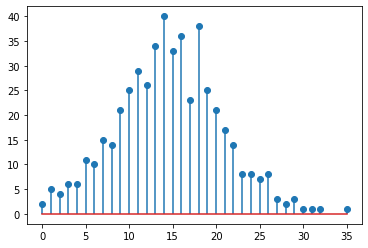

[Token] max: 7, min: 0, avg: 0.7733651226158038


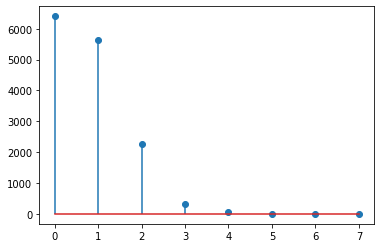

Gazetteer: sgns
Partition Type: train; gECR: 0.6663914120561519
[Sentence] max: 620, min: 1, avg: 47.55903735271998


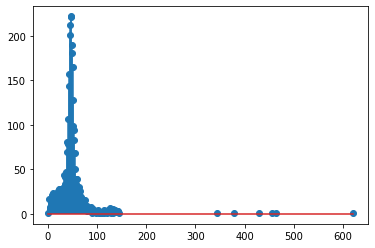

[Token] max: 17, min: 0, avg: 2.4497375823991265


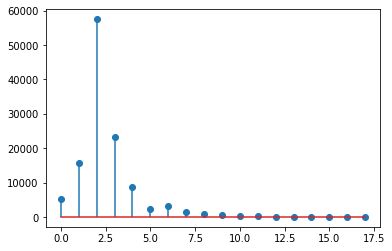

Partition Type: dev; gECR: 0.6564935064935065
[Sentence] max: 440, min: 3, avg: 47.008


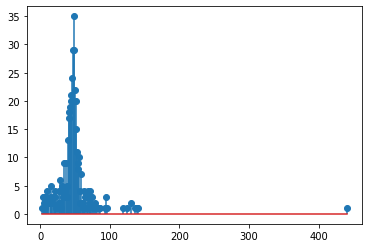

[Token] max: 15, min: 0, avg: 2.3972455492106146


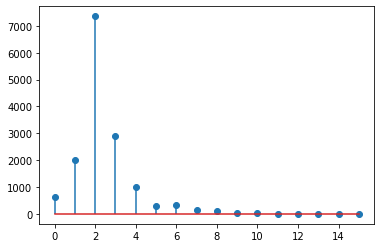

Partition Type: test; gECR: 0.6745373324824505
[Sentence] max: 156, min: 3, avg: 47.19879518072289


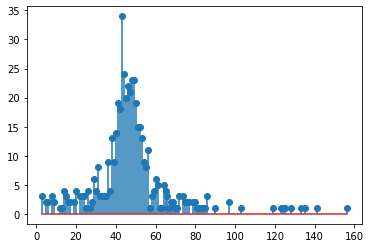

[Token] max: 16, min: 0, avg: 2.468732970027248


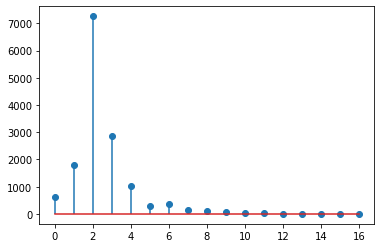

In [48]:
# number report
for i, report in enumerate(reports):
    i += 1
    print(
        "\x1b[6;30;42m# {0} Dataset: {1}; Entity Coverage Ratio: {2} (dev-train), {3} (test-train)\x1b[0m"
        .format(i, report["dataset"], report["span_coverage_ratio"]["dev-train"], report["span_coverage_ratio"]["test-train"])
    )
    print("## {0}.1 Length Distribution".format(i))
    distribution = report["distribution"]
    venn3(
        [set(distribution["train"]["entities"]), set(distribution["dev"]["entities"]), set(distribution["test"]["entities"])],
        ('train', 'dev', 'test')
    )
    plt.show()
    for partition_type in distribution.keys():
        partition = distribution[partition_type]
        print("Partition Type: {0}; ".format(partition_type))
        print(
            "[Sentence] max: {0}, min: {1}, avg: {2}"
            .format(partition["sentence"]["max"], partition["sentence"]["min"], partition["sentence"]["avg"])
        )
        plt.stem([pair[0] for pair in partition["sentence"]["dist"]], [pair[1] for pair in partition["sentence"]["dist"]])
        plt.show()
        print(
            "[Span] max: {0}, min: {1}, avg: {2}"
            .format(partition["span"]["max"], partition["span"]["min"], partition["span"]["avg"])
        )
        plt.stem([pair[0] for pair in partition["span"]["dist"]], [pair[1] for pair in partition["span"]["dist"]])
        plt.show()
        print("[Label] {0}".format(" - ".join([pair[0] for pair in partition["label"]["dist"]])))
        plt.stem([pair[0] for pair in partition["label"]["dist"]], [pair[1] for pair in partition["label"]["dist"]])
        plt.show()
    print("## {0}.2 Gazetteer Matching Distribution".format(i))
    for gazetteer in report["gazetteer"]:
        print("Gazetteer: {0}".format(gazetteer["gazetteer"]))
        for partition_type in gazetteer.keys():
            if partition_type not in ["train", "dev", "test"]:
                continue
            partition = gazetteer[partition_type]
            print("Partition Type: {0}; gECR: {1}".format(partition_type, partition["gECR"]))
            print(
                "[Sentence] max: {0}, min: {1}, avg: {2}"
                .format(partition["sentence"]["max"], partition["sentence"]["min"], partition["sentence"]["avg"])
            )
            plt.stem([pair[0] for pair in partition["sentence"]["dist"]], [pair[1] for pair in partition["sentence"]["dist"]])
            plt.show()
            print(
                "[Token] max: {0}, min: {1}, avg: {2}"
                .format(partition["token"]["max"], partition["token"]["min"], partition["token"]["avg"])
            )
            plt.stem([pair[0] for pair in partition["token"]["dist"]], [pair[1] for pair in partition["token"]["dist"]])
            plt.show()
        